In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
dta = pd.read_csv("./Train data/train.csv")
dte = pd.read_csv("./Test data/test.csv")

In [3]:
Xta = dta.values
Xtestcsv = dte.values
print(Xtestcsv)
#print(Xta)

[['1106.jpg']
 ['2236.jpg']
 ['1131.jpg']
 ['2221.jpg']
 ['2011.jpg']
 ['2030.jpg']
 ['2035.jpg']
 ['1110.jpg']
 ['1104.jpg']
 ['2217.jpg']
 ['1111.jpg']
 ['1100.jpg']
 ['1112.jpg']
 ['1138.jpg']
 ['2238.jpg']
 ['2009.jpg']
 ['2225.jpg']
 ['2240.jpg']
 ['2020.jpg']
 ['2209.jpg']
 ['2029.jpg']
 ['1114.jpg']
 ['2201.jpg']
 ['1118.jpg']
 ['2025.jpg']
 ['2202.jpg']
 ['1117.jpg']
 ['1119.jpg']
 ['2000.jpg']
 ['2007.jpg']
 ['2039.jpg']
 ['2017.jpg']
 ['2215.jpg']
 ['1120.jpg']
 ['2006.jpg']
 ['1116.jpg']
 ['1128.jpg']
 ['1125.jpg']
 ['2203.jpg']
 ['1133.jpg']
 ['1137.jpg']
 ['2220.jpg']
 ['2012.jpg']
 ['2224.jpg']
 ['2206.jpg']
 ['1122.jpg']
 ['2223.jpg']
 ['1102.jpg']
 ['2234.jpg']
 ['2216.jpg']
 ['2016.jpg']
 ['2227.jpg']
 ['2013.jpg']
 ['1113.jpg']
 ['2204.jpg']
 ['1101.jpg']
 ['2208.jpg']
 ['2024.jpg']
 ['2031.jpg']
 ['2222.jpg']
 ['2211.jpg']
 ['2033.jpg']
 ['2213.jpg']
 ['2231.jpg']
 ['2001.jpg']
 ['2040.jpg']
 ['1127.jpg']
 ['2023.jpg']
 ['2015.jpg']
 ['1121.jpg']
 ['2232.jpg']
 ['113

# Data Processing(Converting images into Array)

Train data\Images\Bulbasaur
101
Train data\Images\Charmander
102
Train data\Images\Pikachu
101


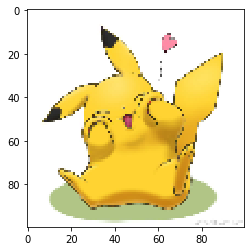

In [4]:
p = Path("./Train data/Images")

dirs = p.glob("*")

    
image_data = []

labels = []

image_path = []        # For storing the image path

labels_dict = { "Pikachu" : 0, "Bulbasaur" : 1 , "Charmander" : 2 }

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    # Iterate over all folder_dir and pick up all the images of the pokemon
    
    for img_path in folder_dir.glob("*.jpg"):
        img = cv2.imread("{0}".format(img_path))
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        plt.imshow(img_array)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt += 1
    print(cnt)
    
    
              


In [5]:
label2pokemon = { 0:"Pikachu", 1 : "Bulbasaur", 2 : "Charmander"  }

# Visualization

In [6]:
print(len(image_data))
print(len(labels))

304
304


In [7]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(304, 100, 100, 3)
(304,)


In [20]:
X = X.reshape((X.shape[0],-1))

In [10]:
print(X.shape)

(304, 30000)


In [22]:
print(X)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [23]:
# Draw Images
def draw_Img(img, label):
    plt.imshow(img)
    plt.title(label2pokemon[label])
    plt.show()
    


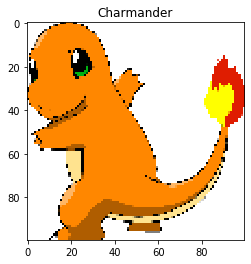

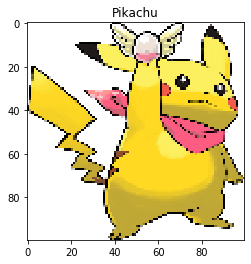

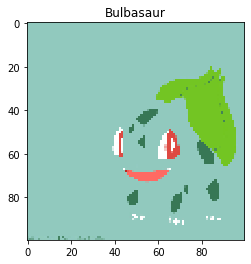

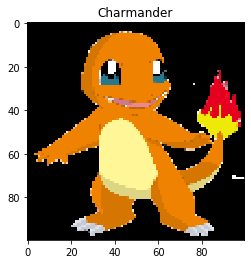

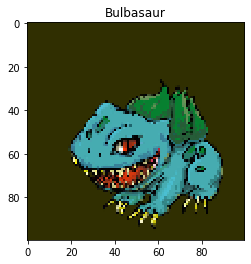

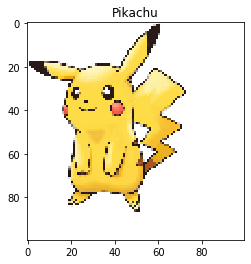

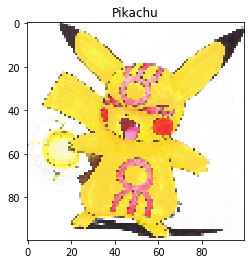

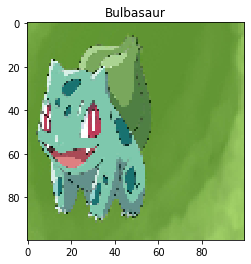

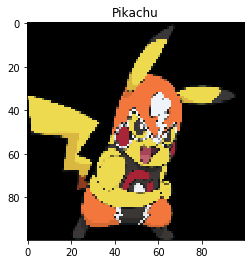

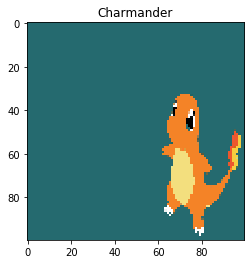

In [24]:
for i in range(10):
    r = np.random.randint(304)
    draw_Img(X[r,]/255,Y[r])

In [25]:
zzzz= "pikachu"
print(zzzz[-5:])

kachu


In [29]:
print(str(img_pathT)[-8:])

2240.jpg


In [27]:
predPoke = {"ImageId" : [], "NameOfPokemon" : []}

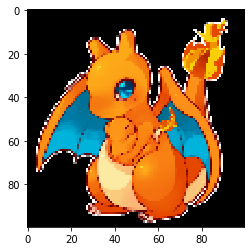

In [28]:
pT = Path("./Test data/Images")

dirsT = pT.glob("*.jpg")

    
image_dataT = []

labelsT = []

image_pathT = []        # For storing the image path


# for folder_dirT in dirsT:
#     labelT = str(folder_dirT).split("\\")[-1]
    
#     cntT = 0
#     print(folder_dirT)
    
# Iterate over all folder_dir and pick up all the images of the pokemon
    
for img_pathT in dirsT:
    imgT = cv2.imread("{0}".format(img_pathT))
    imgT = cv2.resize(imgT, (100, 100))
    imgT = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
    img_arrayT = np.array(imgT)
    predPoke["ImageId"].append(str(img_pathT)[-8:])
    plt.imshow(img_arrayT)
    image_dataT.append(img_arrayT)
    
    
              


In [30]:
print(len(image_dataT))

123


In [31]:
Xtest = np.array(image_dataT)

print(Xtest.shape)

(123, 100, 100, 3)


In [32]:
Xtest = Xtest.reshape((Xtest.shape[0],-1))
print(Xtest.shape)

(123, 30000)


In [33]:
print(Xtest)

[[189 222 107 ... 241 197 105]
 [  0   0   0 ...   0   0   0]
 [208 208 206 ...  72 174  90]
 ...
 [249 128  59 ... 251 148  89]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]]


# SVM Clssifier

In [36]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [37]:
svm_classifier.fit(X,Y)
svm_classifier.score(X,Y)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [30]:
OUTCOME = svm_classifier.predict(Xtest)

In [33]:
print(OUTCOME)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2]


# Classification Algo(KNN)

In [38]:
def distance(p1,p2):
    return np.sum((p2 - p1)**2)**.5

def knn(X,Y,test,k=5):
    m = X.shape[0]
    
    d = []
    for i  in range(m):
        dist = distance(test,X[i])
        d.append((dist,Y[i]))
    
    d = np.array(sorted(d))[:,1]
    d = d[:k]
    t =  np.unique(d,return_counts=True)
    idx = np.argmax(t[1])
    pred = int(t[0][idx])
    if pred == 0:
        output = "Pikachu"
        return output
    elif pred == 1:
        output = "Bulbasaur"
        return output
    else:
        output = "Charmander"
        return output
    

In [40]:
test_data = Xtest[120]
ans = knn(X,Y,test_data,k=5)
print(ans)

ValueError: operands could not be broadcast together with shapes (100,100,3) (30000,) 

In [23]:
for i in range(123):
    test_data = Xtest[i]
    ans = knn(X,Y,test_data,k=1)
    print(ans)
    predPoke["NameOfPokemon"].append(ans)
    #diabetes["Outcome"].append(ans)

Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Bulbasaur
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Bulbasaur
Bulbasaur
Pikachu
Charmander
Charmander
Pikachu
Pikachu
Charmander
Charmander
Pikachu
Pikachu
Charmander
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Pikachu
Charmander
Pikachu
Charmander
Pikachu
Charmander
Pikachu
Pikachu
Bulbasaur
Pikachu
Pikachu
Pikachu
Charmander
Pikachu
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charmander
Charma

In [139]:
print(predPoke)

{'ImageId': ['1100.jpg', '1101.jpg', '1102.jpg', '1103.jpg', '1104.jpg', '1105.jpg', '1106.jpg', '1107.jpg', '1108.jpg', '1109.jpg', '1110.jpg', '1111.jpg', '1112.jpg', '1113.jpg', '1114.jpg', '1115.jpg', '1116.jpg', '1117.jpg', '1118.jpg', '1119.jpg', '1120.jpg', '1121.jpg', '1122.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1126.jpg', '1127.jpg', '1128.jpg', '1129.jpg', '1130.jpg', '1131.jpg', '1132.jpg', '1133.jpg', '1134.jpg', '1135.jpg', '1136.jpg', '1137.jpg', '1138.jpg', '1139.jpg', '1140.jpg', '2000.jpg', '2001.jpg', '2002.jpg', '2003.jpg', '2004.jpg', '2005.jpg', '2006.jpg', '2007.jpg', '2008.jpg', '2009.jpg', '2010.jpg', '2011.jpg', '2012.jpg', '2013.jpg', '2014.jpg', '2015.jpg', '2016.jpg', '2017.jpg', '2018.jpg', '2019.jpg', '2020.jpg', '2021.jpg', '2022.jpg', '2023.jpg', '2024.jpg', '2025.jpg', '2026.jpg', '2027.jpg', '2028.jpg', '2029.jpg', '2030.jpg', '2031.jpg', '2032.jpg', '2033.jpg', '2034.jpg', '2035.jpg', '2036.jpg', '2037.jpg', '2038.jpg', '2039.jpg', '2040.jpg', '22

In [140]:
z={"ImageId" : [], "NameOfPokemon" : []}

In [141]:
ccc = len(predPoke["ImageId"])

In [142]:
for i in range(Xtestcsv.shape[0]):
    for j in range(ccc):
        if Xtestcsv[i] == predPoke["ImageId"][j]:
            z["NameOfPokemon"].append(predPoke["NameOfPokemon"][j])
        

In [143]:
for i in range(Xtestcsv.shape[0]):
    idd = Xtestcsv[i]
    xxxx = str(idd)[2:-2]
    z["ImageId"].append(xxxx)

In [144]:
print(z)

{'ImageId': ['1106.jpg', '2236.jpg', '1131.jpg', '2221.jpg', '2011.jpg', '2030.jpg', '2035.jpg', '1110.jpg', '1104.jpg', '2217.jpg', '1111.jpg', '1100.jpg', '1112.jpg', '1138.jpg', '2238.jpg', '2009.jpg', '2225.jpg', '2240.jpg', '2020.jpg', '2209.jpg', '2029.jpg', '1114.jpg', '2201.jpg', '1118.jpg', '2025.jpg', '2202.jpg', '1117.jpg', '1119.jpg', '2000.jpg', '2007.jpg', '2039.jpg', '2017.jpg', '2215.jpg', '1120.jpg', '2006.jpg', '1116.jpg', '1128.jpg', '1125.jpg', '2203.jpg', '1133.jpg', '1137.jpg', '2220.jpg', '2012.jpg', '2224.jpg', '2206.jpg', '1122.jpg', '2223.jpg', '1102.jpg', '2234.jpg', '2216.jpg', '2016.jpg', '2227.jpg', '2013.jpg', '1113.jpg', '2204.jpg', '1101.jpg', '2208.jpg', '2024.jpg', '2031.jpg', '2222.jpg', '2211.jpg', '2033.jpg', '2213.jpg', '2231.jpg', '2001.jpg', '2040.jpg', '1127.jpg', '2023.jpg', '2015.jpg', '1121.jpg', '2232.jpg', '1139.jpg', '1103.jpg', '2018.jpg', '2233.jpg', '2212.jpg', '2210.jpg', '2228.jpg', '2026.jpg', '1132.jpg', '2003.jpg', '1129.jpg', '22

In [145]:
people = pd.DataFrame(z)
people.to_csv('./predictionfinal5atk__1.csv' , index=False)

In [2]:
# 1 create an object

lr = LinearRegression(normalize=True)

# 2 Training

lr.fit(X, Y)

# 3 Output Parameters

print(lr.coef_)
print(lr.intercept_)

NameError: name 'X' is not defined

# Logistic Rgression For 3 classes

In [ ]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [138]:
from sklearn import svm

In [139]:
svm_classifier = svm.SVC(kernel='multiple',C=1.0)

In [140]:
svm_classifier.fit(X,Y)
#svm_classifier.score(image_data,labels)

ValueError: Found array with dim 4. Estimator expected <= 2.